# House Price Prediction Exercise

This notebook demonstrates how to predict house prices using the house price dataset. We'll go through the process of loading data, preprocessing, model creation, and visualization of results.

## Importing Required Libraries

First, let's import all the necessary libraries.

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

## Loading the Data

We'll define a function to load our dataset from a CSV file.

In [0]:
def load_data(filepath):
    """
    Load the data from the given filepath.
    """
    df = pd.read_csv(filepath)
    return df


filepath = "/Volumes/mlops_dev/house_prices/data/data.csv"
df = load_data(filepath)

## Preprocessing

In [0]:
def preprocess_data(df, target_column="SalePrice"):
    """
    Preprocess the data.

    Args:
    df (pandas.DataFrame): The input dataframe
    target_column (str): The name of the target column (default is 'SalePrice')

    Returns:
    X (pandas.DataFrame): The feature dataframe
    y (pandas.Series): The target series
    preprocessor (ColumnTransformer): The preprocessing pipeline
    """

    # Remove rows with missing target
    df = df.dropna(subset=[target_column])

    # Separate features and target
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    # Identify numeric and categorical columns
    numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
    categorical_features = X.select_dtypes(include=["object"]).columns

    # Create preprocessing steps for numeric and categorical data
    numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())])

    categorical_transformer = Pipeline(
        steps=[
            ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
            ("onehot", OneHotEncoder(handle_unknown="ignore")),
        ]
    )

    # Combine preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, numeric_features),
            ("cat", categorical_transformer, categorical_features),
        ]
    )

    print("Features shape:", X.shape)
    print("Target shape:", y.shape)

    return X, y, preprocessor


X, y, preprocessor = preprocess_data(df)

Features shape: (1460, 80)
Target shape: (1460,)


## Model Creation and Training


In [0]:
def train_and_evaluate_model(X, y, preprocessor, test_size=0.2, random_state=42, n_estimators=100):
    # Create a pipeline with a preprocessor and a regressor
    model = Pipeline(
        steps=[
            ("preprocessor", preprocessor),
            ("regressor", RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)),
        ]
    )

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print the metrics
    print(f"Mean Squared Error: {mse}")
    print(f"R2 Score: {r2}")

    return model, mse, r2, X_train, X_test, y_train, y_test, y_pred


model, mse, r2, X_train, X_test, y_train, y_test, y_pred = train_and_evaluate_model(X, y, preprocessor)

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Mean Squared Error: 870348388.494296
R2 Score: 0.8865304597242845


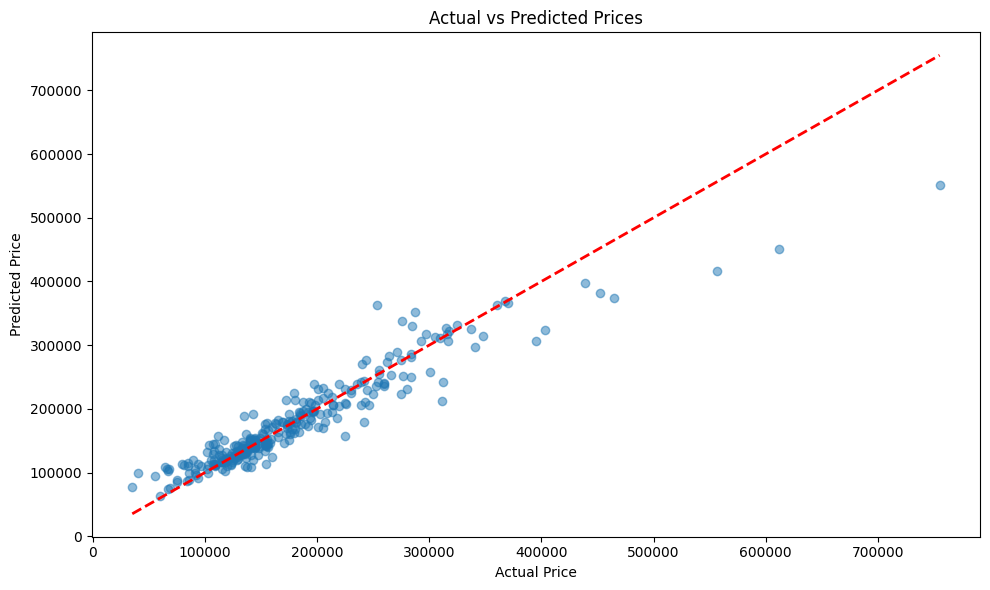

In [0]:
def plot_actual_vs_predicted(
    y_test, y_pred, xlabel="Actual Price", ylabel="Predicted Price", title="Actual vs Predicted Prices"
):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.tight_layout()


plot_actual_vs_predicted(y_test, y_pred)

## Feature Importance

Finally, let's look at the top 10 most important features in our model.

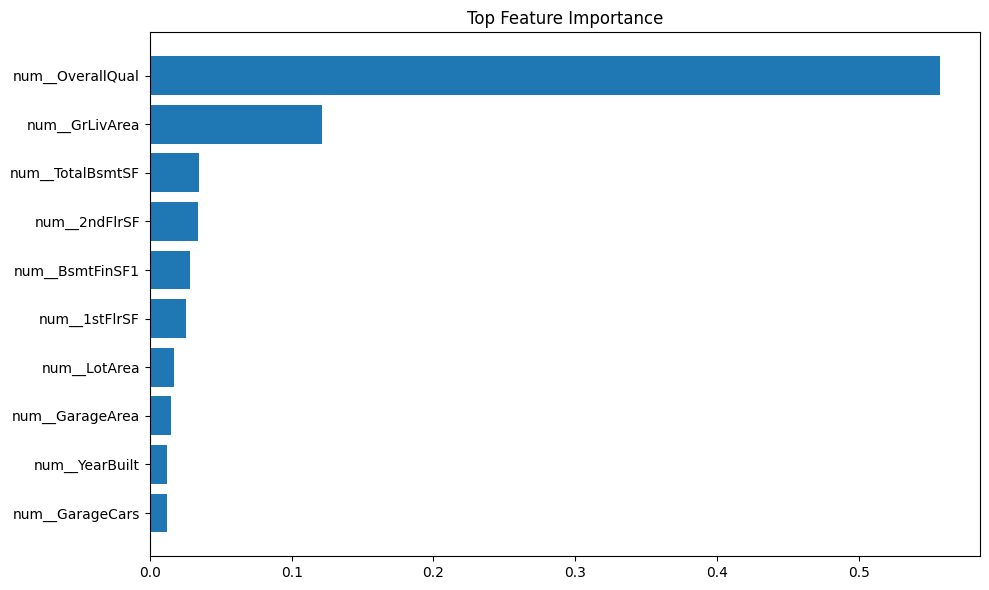

In [0]:
def plot_feature_importance(model, top_n=10, title="Top Feature Importance", figsize=(10, 6)):
    # Extract feature importance and feature names
    feature_importance = model.named_steps["regressor"].feature_importances_
    feature_names = model.named_steps["preprocessor"].get_feature_names_out()

    # Plot feature importance
    plt.figure(figsize=figsize)
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(top_n) + 0.5
    plt.barh(pos, feature_importance[sorted_idx[-top_n:]])
    plt.yticks(pos, feature_names[sorted_idx[-top_n:]])
    plt.title(title)
    plt.tight_layout()
    plt.show()


plot_feature_importance(model)